### QED-C Application-Oriented Benchmarks - Qiskit Version - Max-Cut
The notebook contains Max-Cut application-oriented benchmark for the Qiskit API.
Configure and run the cell below with the desired execution settings.
Then execute the remaining cells, each containing one variation on the benchmark.

In [1]:
min_qubits=4
max_qubits=8
max_circuits=1
num_shots=1000

backend_id="qasm_simulator"
hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = {}

# # ==========================
# # *** If using IBMQ hardware, run this once to authenticate
# from qiskit import IBMQ
# IBMQ.save_account('YOUR_API_TOKEN_HERE')

# # *** If you are part of an IBMQ group, set hub, group, and project name here
# hub="YOUR_HUB_NAME"; group="YOUR_GROUP_NAME"; project="YOUR_PROJECT_NAME"

# # *** This example shows how to specify an IBMQ backend using a known "backend_id"
# exec_options = { "optimization_level":3, "use_sessions":True, "resilience_level":1}
# backend_id="ibmq_belem"

# # ==========================
# # *** If using Azure Quantum, use this hub identifier and specify the desired backend_id
# # Identify your resources with env variables AZURE_QUANTUM_RESOURCE_ID and AZURE_QUANTUM_LOCATION
# hub="azure-quantum"; group="open"; project="QED-C App-Oriented Benchmarks - Qiskit Version"
# backend_id="<YOUR_BACKEND_NAME_HERE>"

# # ==========================
# The remaining examples create a provider instance and get a backend from it

# # An example using IonQ provider
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()   # Be sure to set the QISKIT_IONQ_API_TOKEN environment variable
# provider_backend = provider.get_backend("ionq_qpu")
# backend_id="ionq_qpu"

# # An example using BlueQubit provider
# import sys
# sys.path.insert(1, "../..")
# import os, bluequbit, _common.executors.bluequbit_executor as bluequbit_executor
# provider_backend = bluequbit.init()
# backend_id="BlueQubit-CPU"
# exec_options = { "executor": bluequbit_executor.run, "device":'cpu' }

# # *** Here's an example of using a typical custom provider backend (e.g. AQT simulator)
# import os
# from qiskit_aqt_provider import AQTProvider
# provider = AQTProvider(os.environ.get('AQT_ACCESS_KEY'))    # get your key from environment
# provider_backend = provider.backends.aqt_qasm_simulator_noise_1
# backend_id="aqt_qasm_simulator_noise_1"


In [2]:
# Custom optimization options can be specified in this cell (below is an example)

import sys
sys.path.insert(1, "../../")

# # Example of pytket Transformer
# import _common.transformers.tket_optimiser as tket_optimiser
# exec_options.update({ "optimization_level": 0, "layout_method":'sabre', "routing_method":'sabre', "transformer": tket_optimiser.high_optimisation })

# # Define a custom noise model to be used during execution
# import _common.custom.custom_qiskit_noise_model as custom_qiskit_noise_model
# exec_options.update({ "noise_model": custom_qiskit_noise_model.my_noise_model() })

# # Example of mthree error mitigation
# import _common.postprocessors.mthree.mthree_em as mthree_em
# exec_options.update({ "postprocessor": mthree_em.get_mthree_handlers(backend_id, provider_backend) })


### Maxcut - Method 1

MaxCut (1) Benchmark Program - Qiskit
... execution starting at Jul 25, 2024 04:05:05 UTC
************
Executing [1] circuits for num_qubits = 4
************
Executing [1] circuits for num_qubits = 6
************
Executing [1] circuits for num_qubits = 8
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 21, 0.462
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 22, 0.4, 12.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.211, 0.06, 0.002 secs
Average Transpiling, Validating, Running Times for group 4 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 0.998, 0.998

************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 18, 0.462
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 19, 0.4, 18.0
Average Creation, Elapsed, Execution Time for the 6 qubit group = 0.007, 0.036, 0.002 secs
Average Transpiling, Validating, Runnin

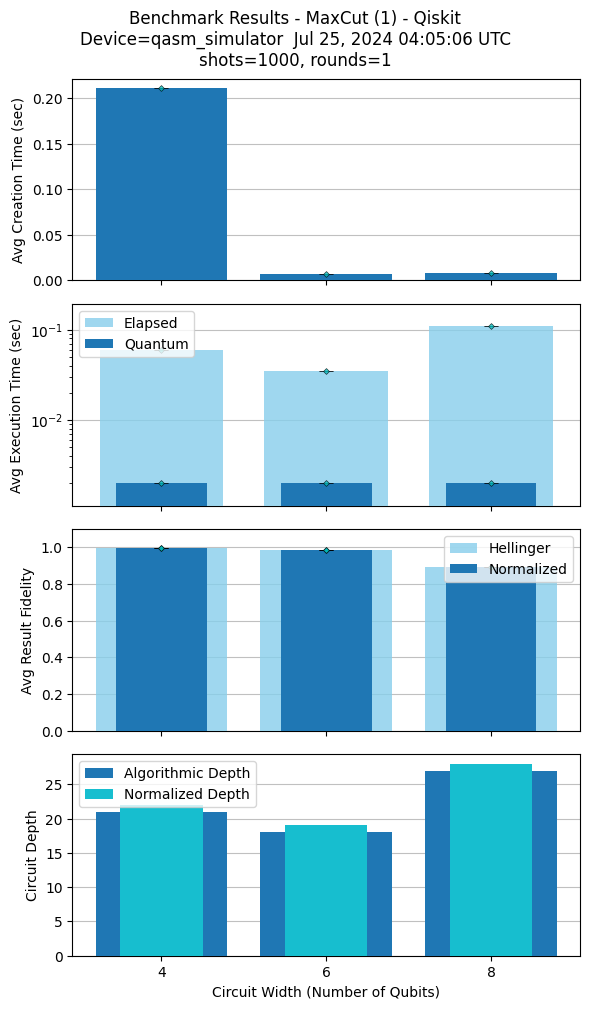

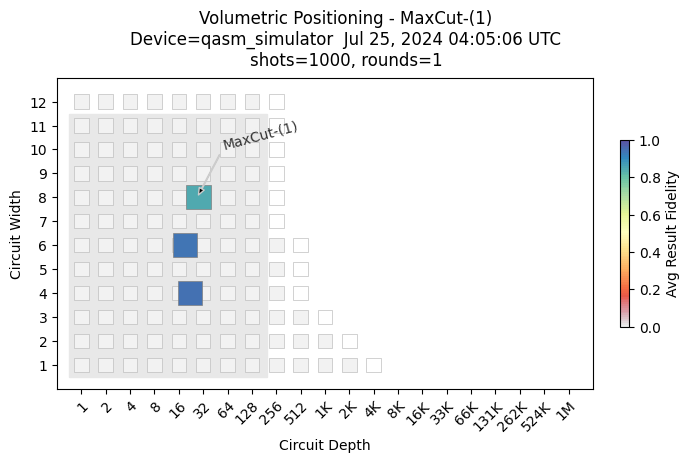

In [3]:
import sys
sys.path.insert(1, "maxcut/qiskit")
import maxcut_benchmark

# set noise to None for testing
# import execute
# execute.set_noise_model(None)

maxcut_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=1, rounds=1,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options
)

### Maxcut - Method 2 - Degree 3 - Approximation Ratio as Objective Function

MaxCut (2) Benchmark Program - Qiskit
... execution starting at Jul 25, 2024 04:05:07 UTC
************
Executing [1] restarts for num_qubits = 4

..............................
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 40, 0.5
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 41, 0.462, 24.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.0, 0.01, 0.002 secs
Average Transpiling, Validating, Running Times for group 4 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 1.0, 1.0

************
Executing [1] restarts for num_qubits = 6

..............................
************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 34, 0.5
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 35, 0.462, 36.0
Average Creation, Elapsed, Execution Time for the 6 qubit group = 0.0, 0.012, 0.002 secs
Average Transpiling, Validating, Runni

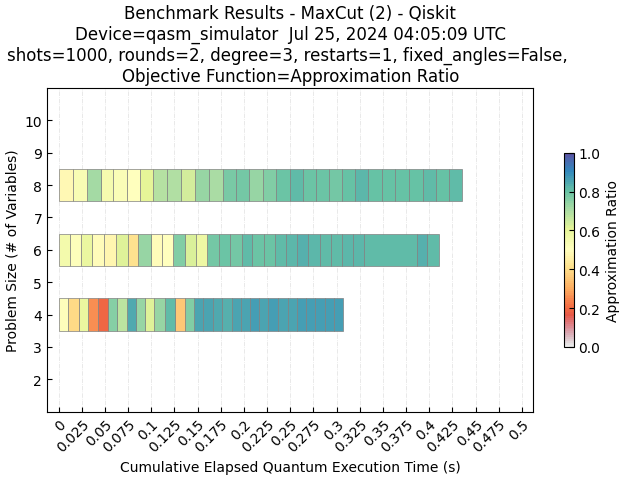

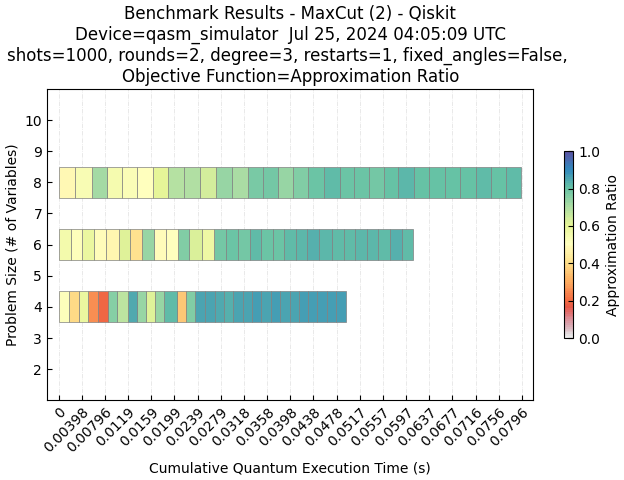

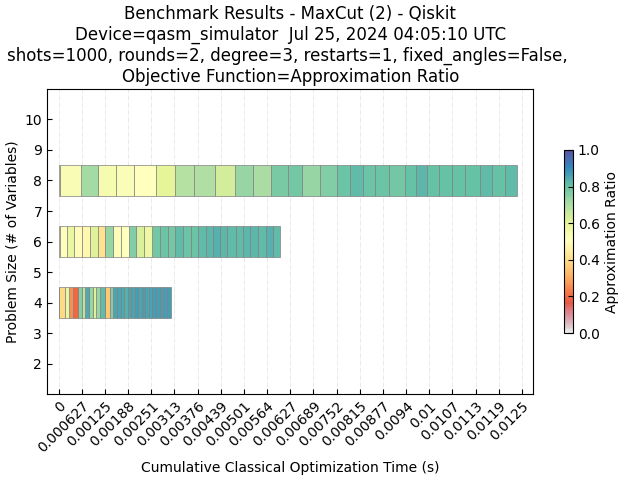

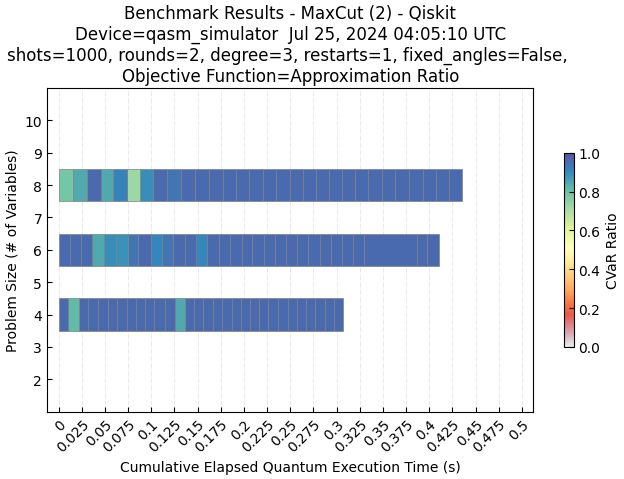

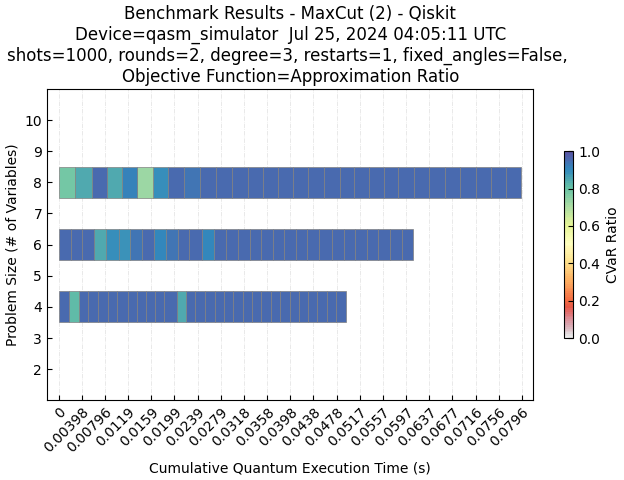

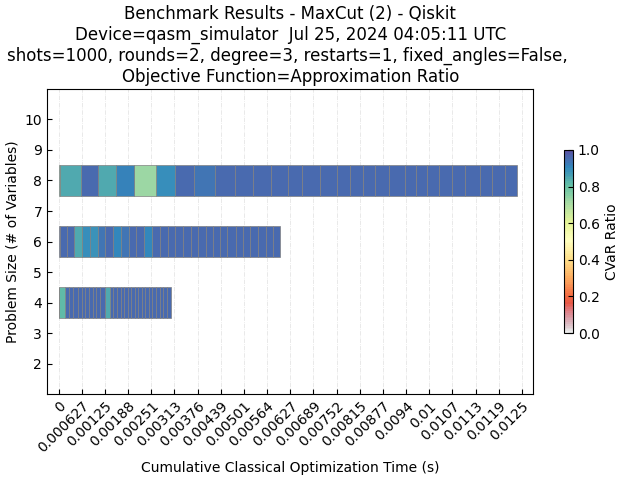

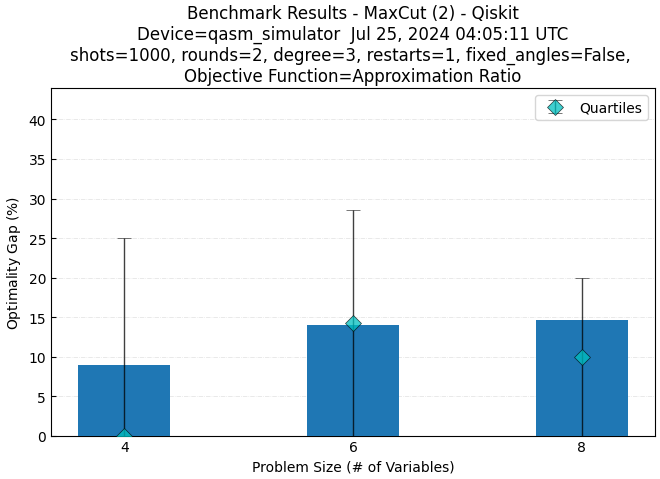

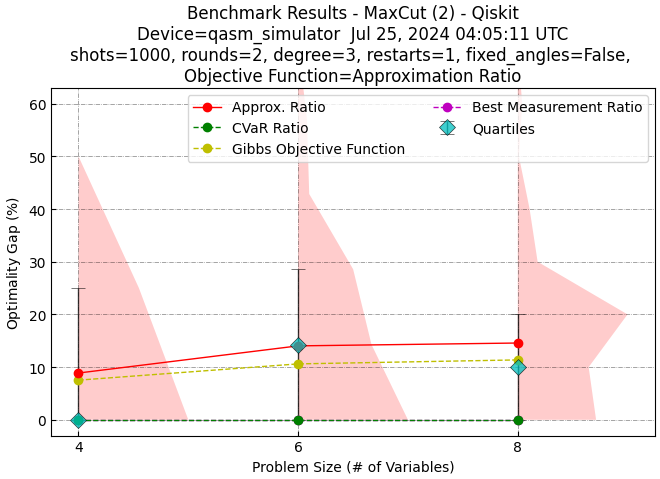

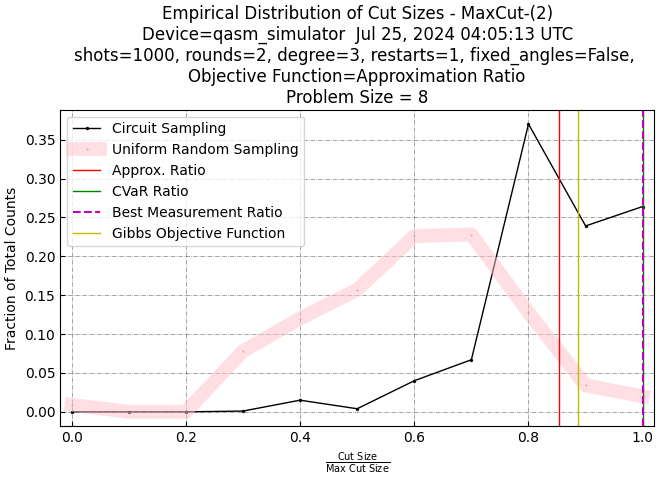

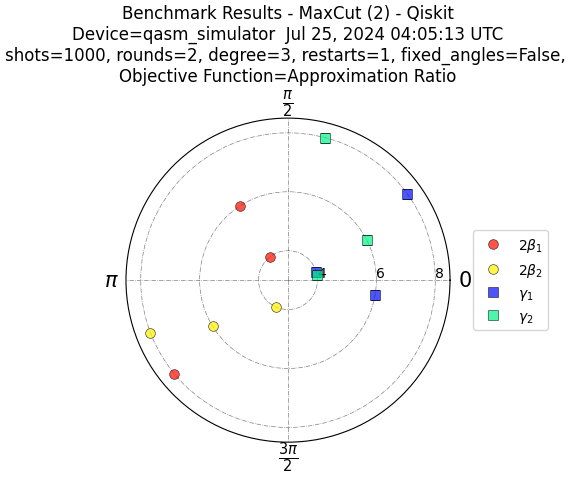

In [4]:
import sys
sys.path.insert(1, "maxcut/qiskit")
import maxcut_benchmark

# # set noise to None for testing
# import execute
# execute.set_noise_model(None)

# execute and display options
objective_func_type = 'approx_ratio'
score_metric=['approx_ratio', 'cvar_ratio']
x_metric=['cumulative_elapsed_time', 'cumulative_exec_time', 'cumulative_opt_exec_time']

# Note: the plots produced by this benchmark only use the last of the problems at each width

maxcut_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=2, rounds=2, degree=3, do_fidelities=False, parameterized=False, use_fixed_angles=False,
    score_metric=score_metric, x_metric=x_metric, save_res_to_file=True, comfort=True,
    objective_func_type = objective_func_type,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options
)

### Load Data From File and Regenerate Plots
This cell can be used to re-load the data stored during benchmark execution and plot the results.

Be sure to first execute the initial cell which sets the backend_id

... execution starting at Jul 25, 2024 04:05:13 UTC
Loading from width_4_restartInd_1.json, corresponding to 4 qubits and restart index 1
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 40, 0.5
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 41, 0.462, 24.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.0, 0.01, 0.002 secs
Average Transpiling, Validating, Running Times for group 4 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 1.0, 1.0

Loading from width_6_restartInd_1.json, corresponding to 6 qubits and restart index 1
************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 34, 0.5
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 35, 0.462, 36.0
Average Creation, Elapsed, Execution Time for the 6 qubit group = 0.0, 0.012, 0.002 secs
Average Transpiling, Validating, Running Times for group 6 = 0.001, 0.001, 0.0

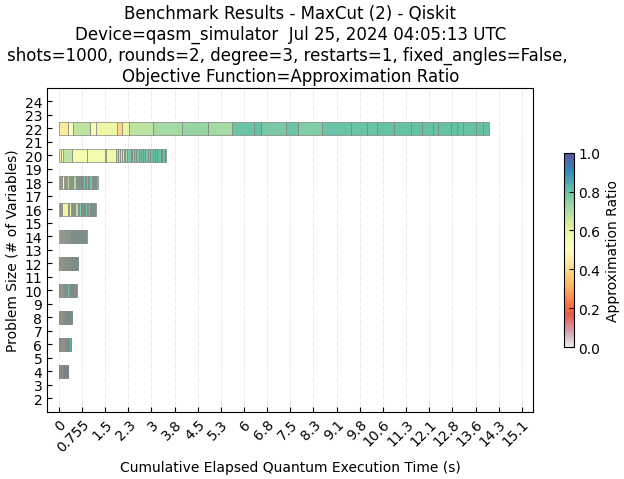

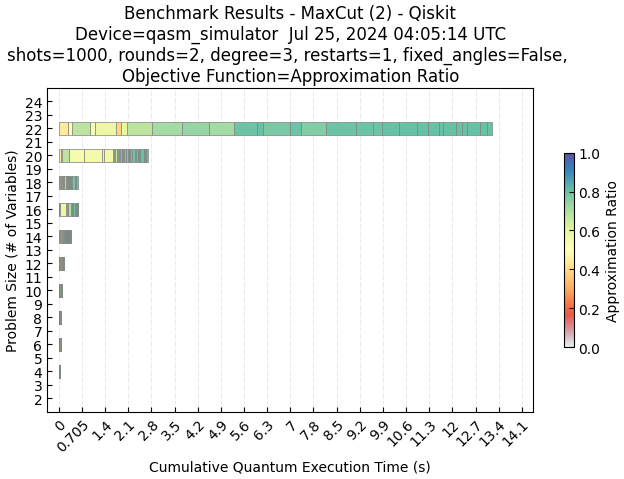

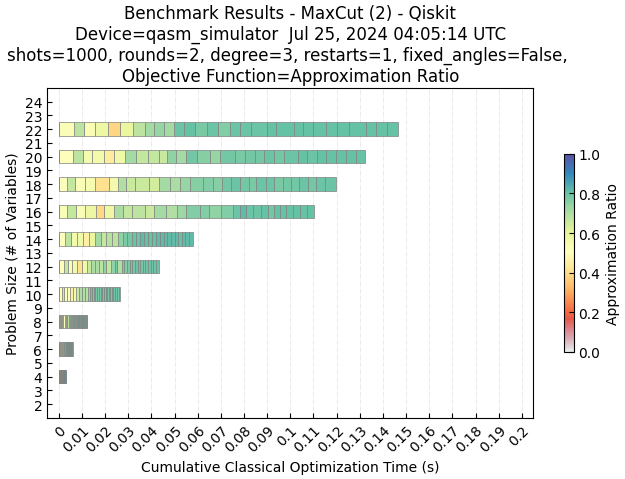

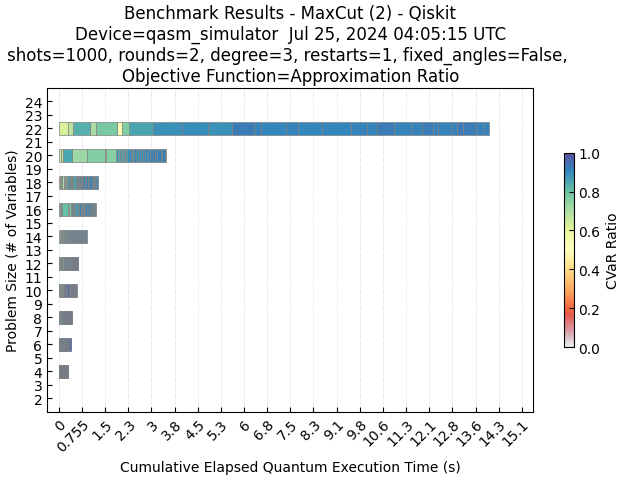

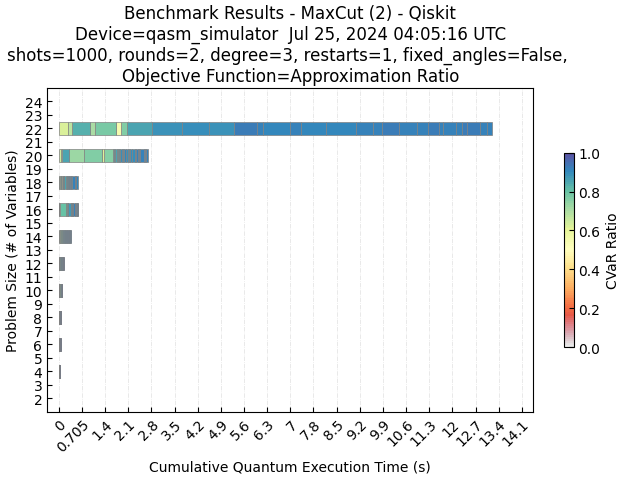

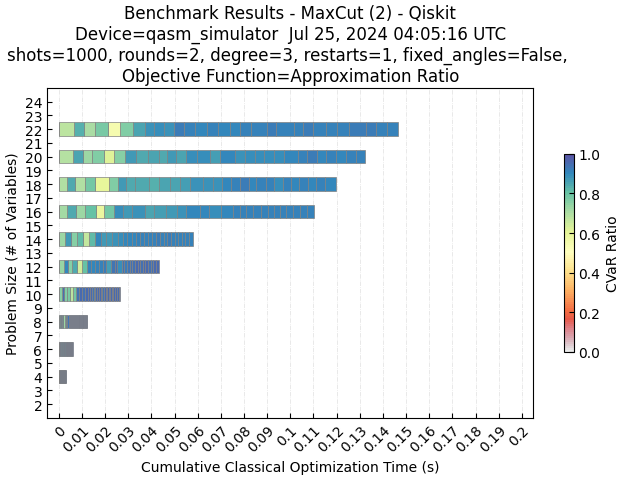

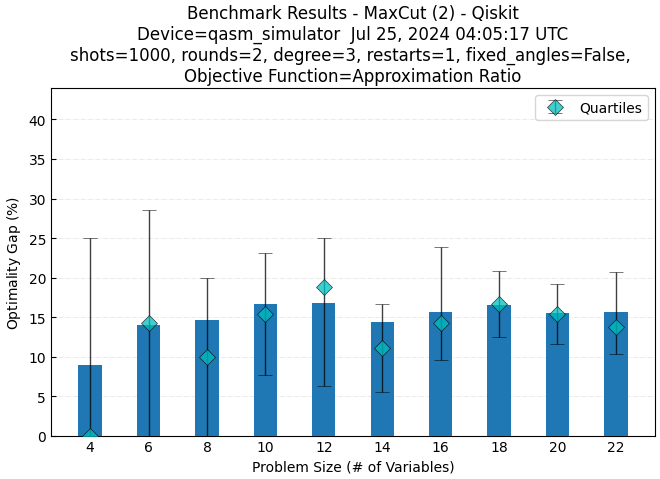

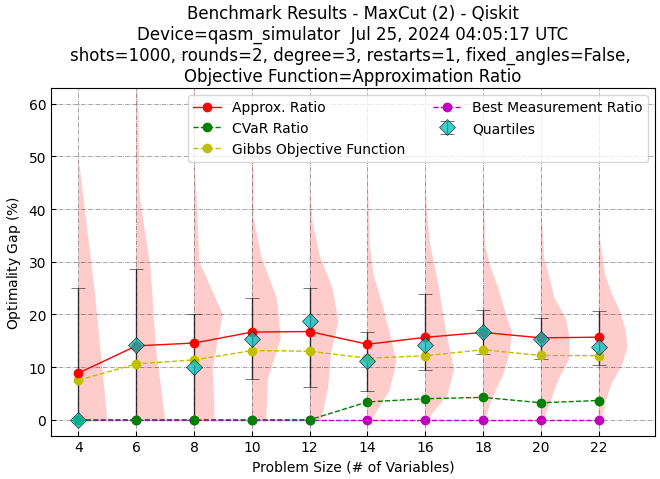

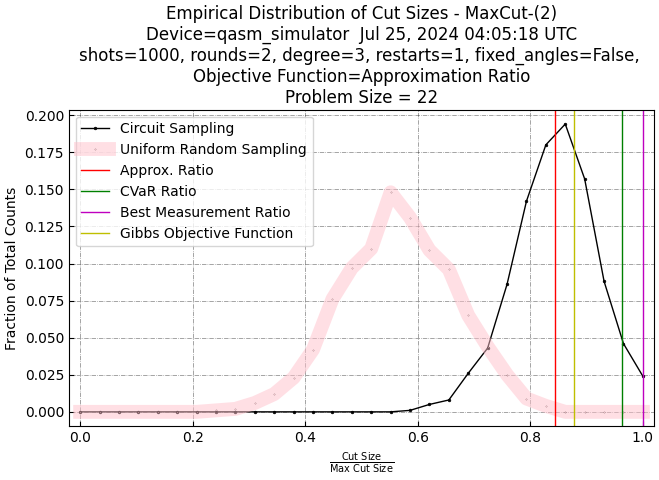

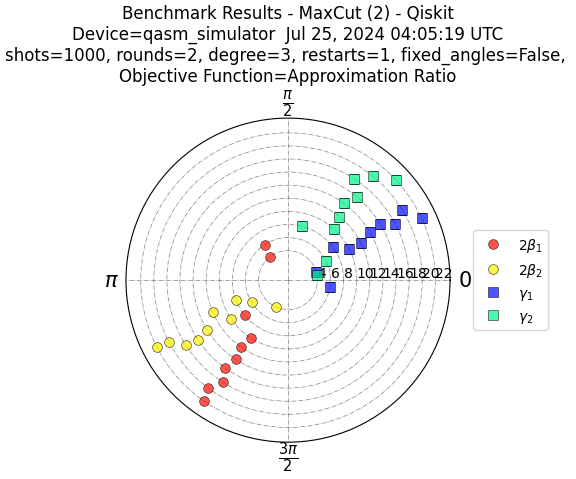

In [5]:
import os, maxcut_benchmark
backend_id = "qasm_simulator"
maxcut_benchmark.load_data_and_plot(os.path.join('__results', backend_id, 'approx_ratio'),
                score_metric=['approx_ratio', 'cvar_ratio'],
                x_metric=['cumulative_elapsed_time', 'cumulative_exec_time', 'cumulative_opt_exec_time'])

### Maxcut - Method 2 - Degree 3 - CVaR Objective Function

MaxCut (2) Benchmark Program - Qiskit
... execution starting at Jul 25, 2024 04:05:19 UTC
************
Executing [1] restarts for num_qubits = 4
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 40, 0.5
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 41, 0.462, 24.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.0, 0.009, 0.002 secs
Average Transpiling, Validating, Running Times for group 4 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 1.0, 1.0

************
Executing [1] restarts for num_qubits = 6
************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 34, 0.5
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 35, 0.462, 36.0
Average Creation, Elapsed, Execution Time for the 6 qubit group = 0.0, 0.014, 0.003 secs
Average Transpiling, Validating, Running Times for group 6 = 0.001, 0.001, 0.001 secs
Average Helling

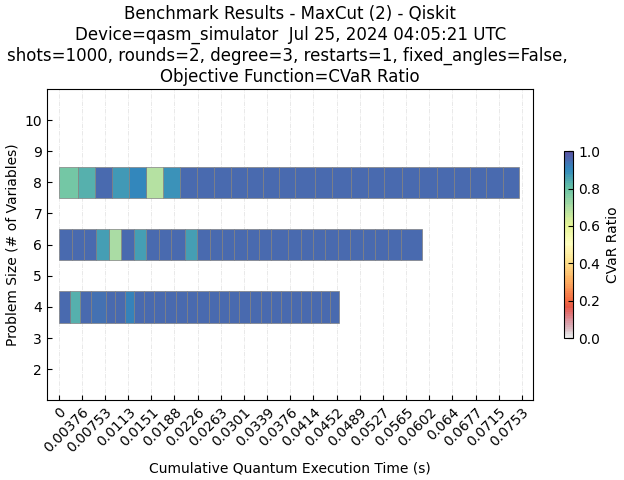

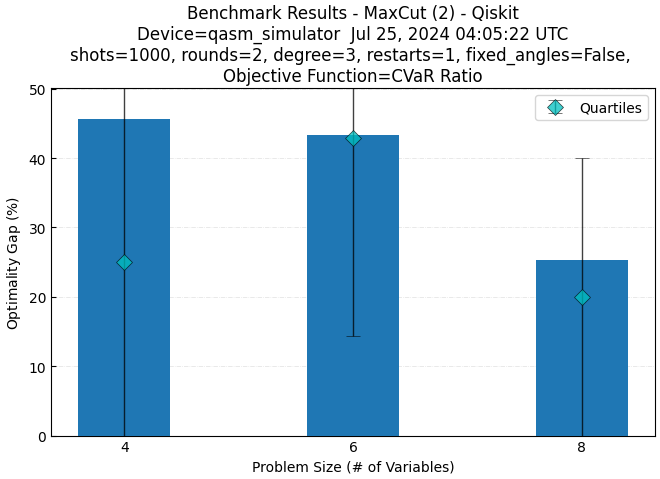

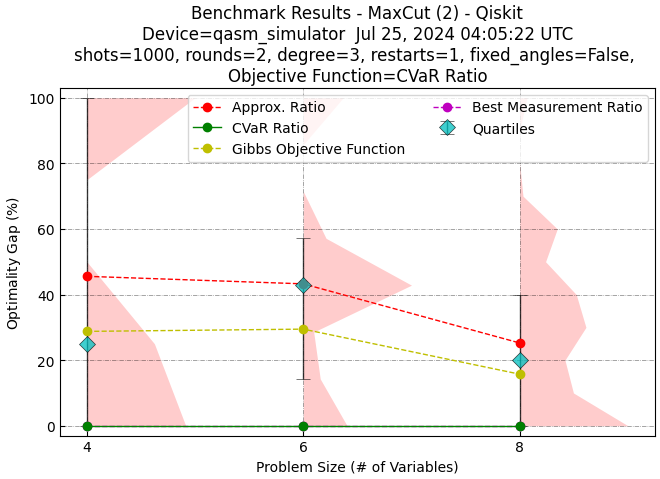

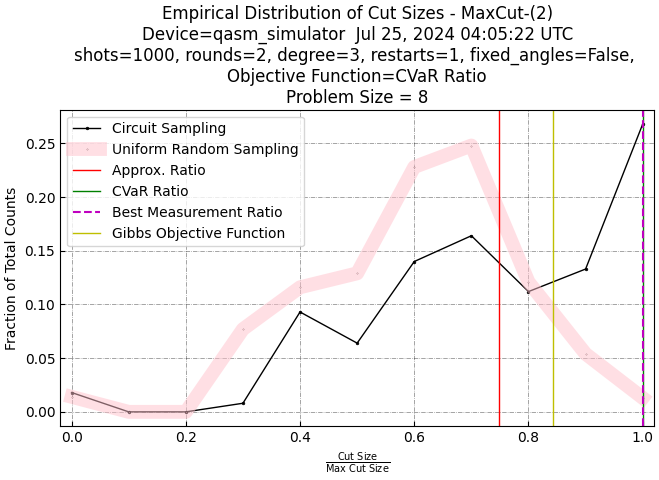

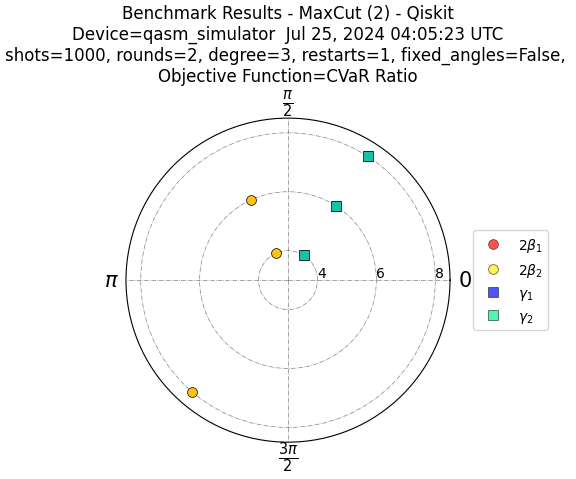

In [6]:
import sys
sys.path.insert(1, "maxcut/qiskit")
import maxcut_benchmark

# set noise to None for testing
import execute
execute.set_noise_model(None)

objective_func_type = 'cvar_ratio'
score_metric=[objective_func_type]
x_metric=['cumulative_exec_time']

# Note: the plots produced by this benchmark only use the last of the problems at each width

maxcut_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=2, rounds=2, degree=3, alpha = 0.1,
    objective_func_type = objective_func_type, do_fidelities = False,
    score_metric=score_metric, x_metric=x_metric, num_x_bins=15, max_iter=30,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options
)

### Maxcut - Method 2 - Degree 3 - Gibbs Objective function

MaxCut (2) Benchmark Program - Qiskit
... execution starting at Jul 25, 2024 04:05:23 UTC
************
Executing [1] restarts for num_qubits = 4
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 40, 0.5
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 41, 0.462, 24.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.0, 0.01, 0.002 secs
Average Transpiling, Validating, Running Times for group 4 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 1.0, 1.0

************
Executing [1] restarts for num_qubits = 6
************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 34, 0.5
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 35, 0.462, 36.0
Average Creation, Elapsed, Execution Time for the 6 qubit group = 0.0, 0.013, 0.003 secs
Average Transpiling, Validating, Running Times for group 6 = 0.001, 0.001, 0.001 secs
Average Hellinge

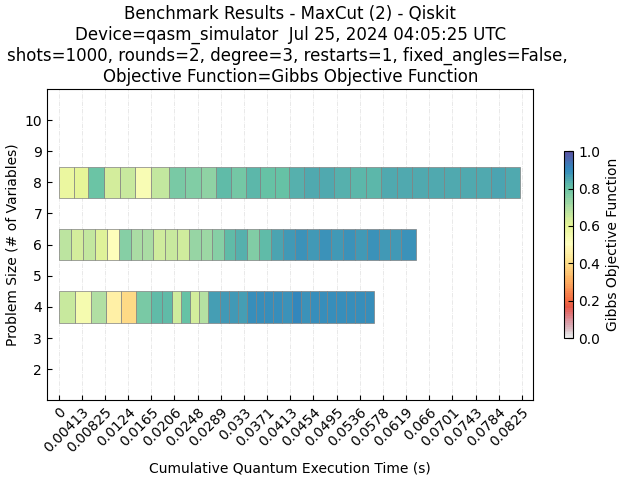

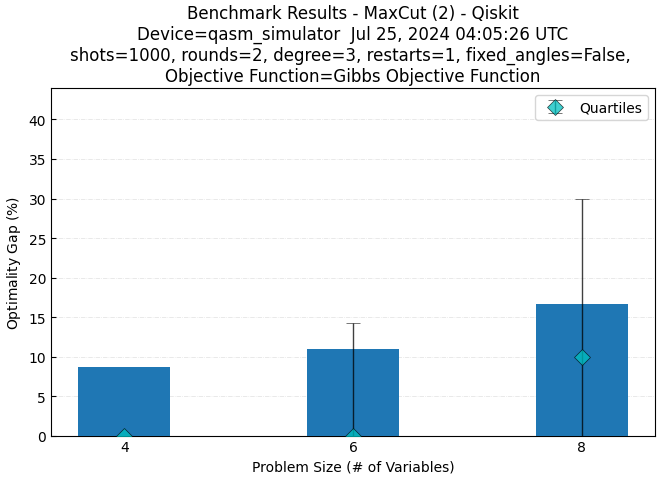

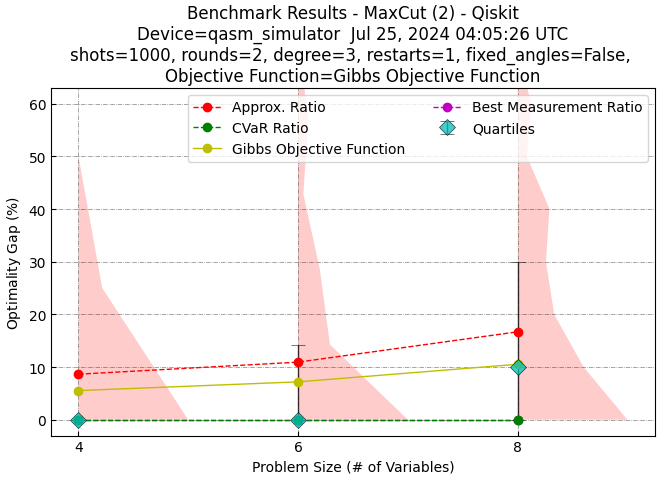

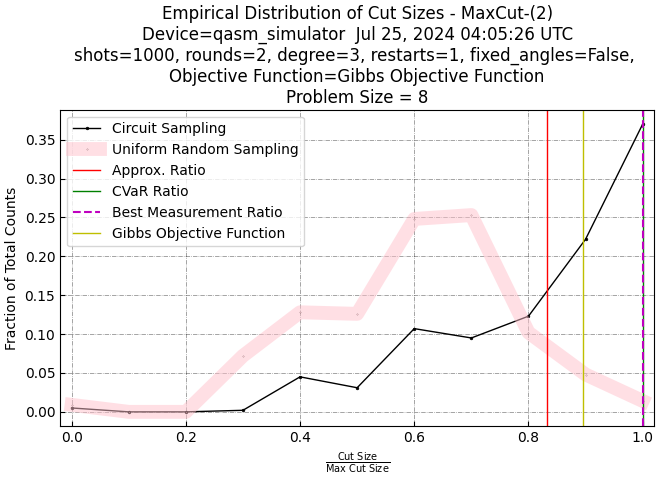

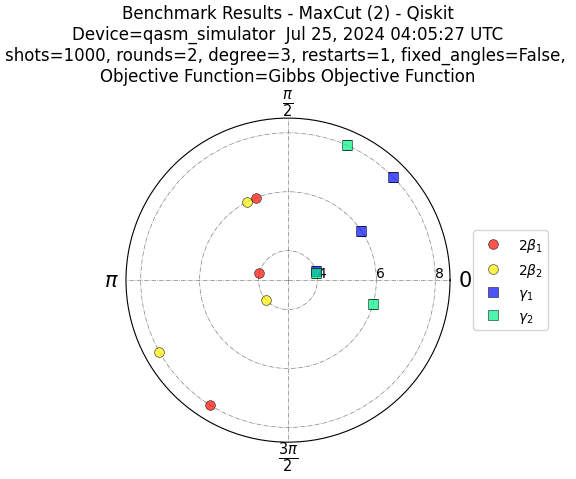

In [7]:
import sys
sys.path.insert(1, "maxcut/qiskit")
import maxcut_benchmark

# set noise to None for testing
import execute
execute.set_noise_model(None)

objective_func_type = 'gibbs_ratio'
score_metric=[objective_func_type] #, 'fidelity'
x_metric=['cumulative_exec_time'] #, , 'cumulative_create_time' 'cumulative_opt_exec_time'

# Note: the plots produced by this benchmark only use the last of the problems at each width

maxcut_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=2, rounds=2, degree=3, eta=0.5,
    score_metric=score_metric, x_metric=x_metric, num_x_bins=15, max_iter=30,
    objective_func_type = objective_func_type, do_fidelities = False,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options
)

### Maxcut - Method 2 - Degree -3

MaxCut (2) Benchmark Program - Qiskit
... execution starting at Jul 25, 2024 04:05:27 UTC
************
Executing [1] restarts for num_qubits = 4
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 21, 0.462
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 22, 0.4, 12.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.005, 0.008, 0.001 secs
Average Transpiling, Validating, Running Times for group 4 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 0.994, 0.994

************
Executing [1] restarts for num_qubits = 6
************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 18, 0.462
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 19, 0.4, 18.0
Average Creation, Elapsed, Execution Time for the 6 qubit group = 0.006, 0.01, 0.002 secs
Average Transpiling, Validating, Running Times for group 6 = 0.001, 0.001, 0.001 secs
Average 

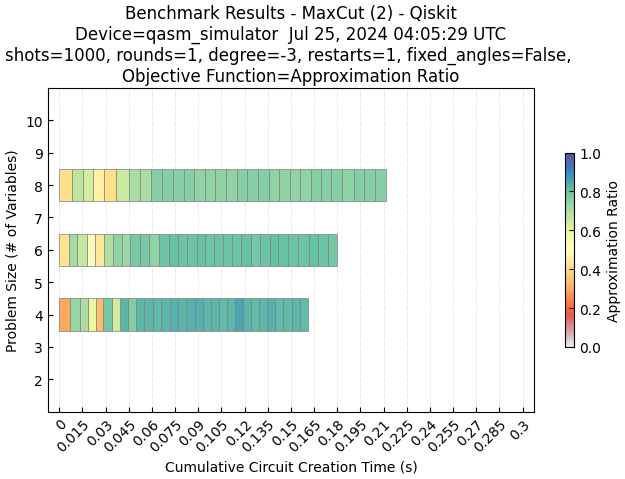

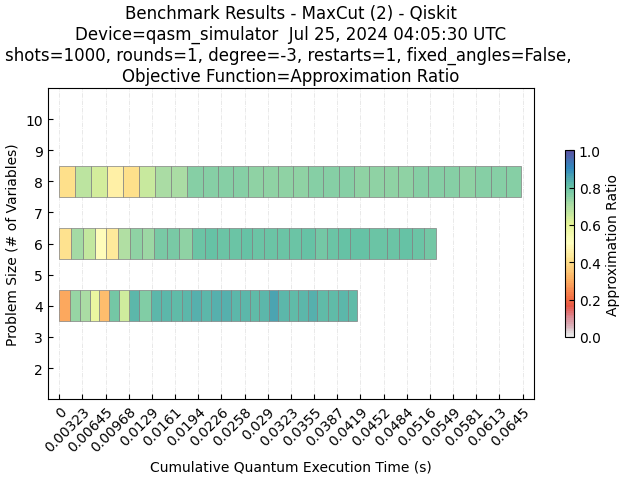

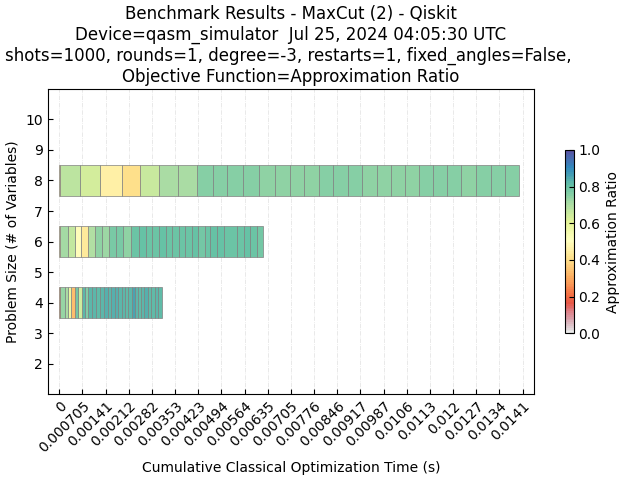

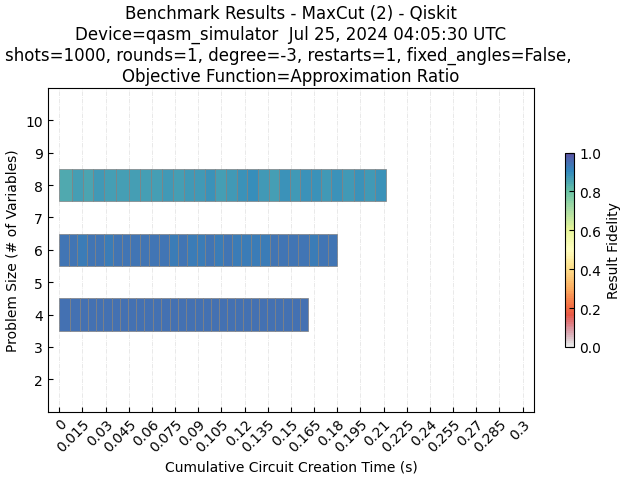

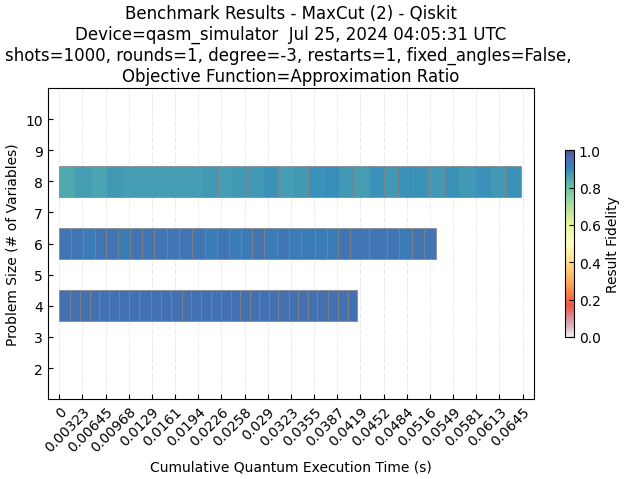

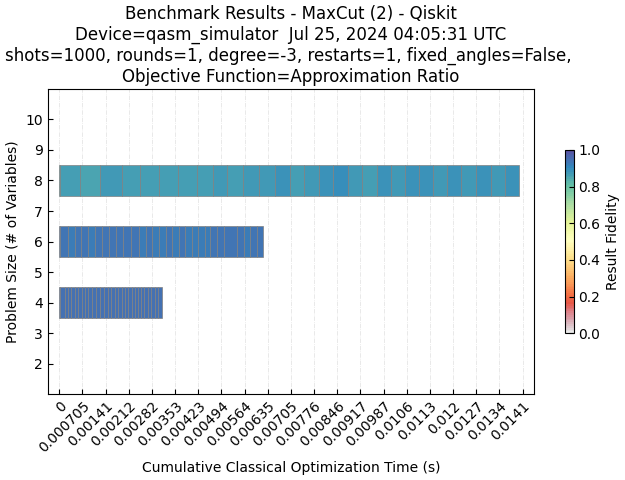

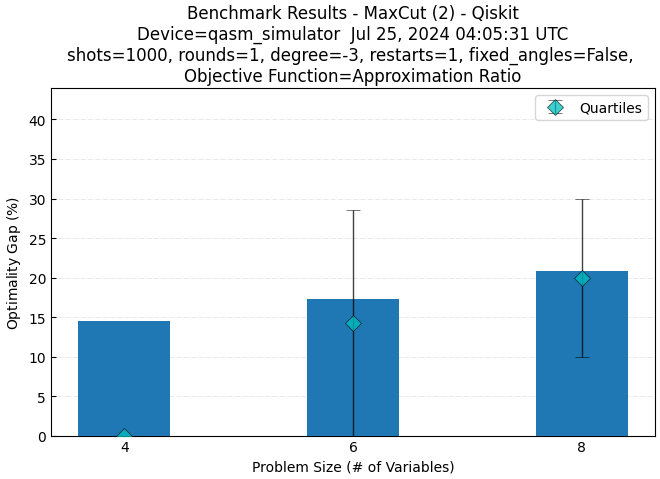

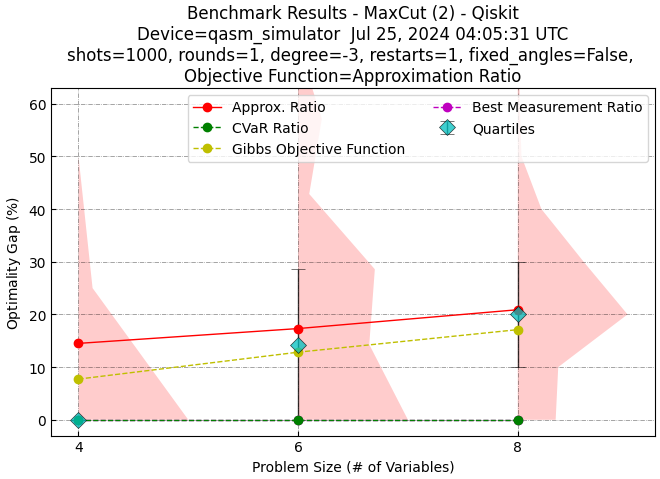

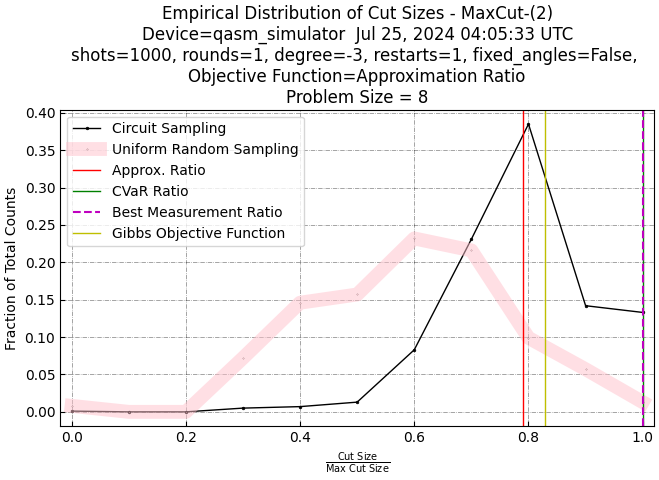

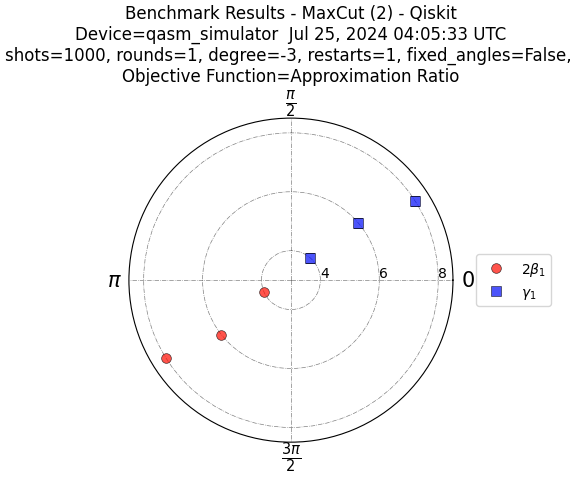

In [8]:
import sys
sys.path.insert(1, "maxcut/qiskit")
import maxcut_benchmark

# set noise to None for testing
import execute
execute.set_noise_model(None)

score_metric=['approx_ratio', 'fidelity']
x_metric=['cumulative_create_time', 'cumulative_exec_time', 'cumulative_opt_exec_time']

# Note: the plots produced by this benchmark only use the last of the problems at each width

maxcut_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=2, rounds=1, degree=-3,
    score_metric=score_metric, x_metric=x_metric, num_x_bins=15, max_iter=30,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options
)

### Expected Measurement Distribution Example

The next cell is an auto-generated circuit with beta and gamma set to the optimal parameters (in terms of pi)


Total counts are: {'1011': 17, '0111': 23, '0110': 131, '0011': 127, '1010': 135, '1111': 15, '1000': 27, '1100': 135, '0001': 21, '0000': 22, '1001': 133, '0101': 117, '0010': 28, '0100': 21, '1110': 22, '1101': 26}
         ┌───┐                                                         »
q4633_0: ┤ H ├──■────────────────────■────■────────────────────■────■──»
         ├───┤┌─┴─┐┌──────────────┐┌─┴─┐  │                    │    │  »
q4633_1: ┤ H ├┤ X ├┤ Rz(-0.59062) ├┤ X ├──┼────────────────────┼────┼──»
         ├───┤└───┘└──────────────┘└───┘  │                    │  ┌─┴─┐»
q4633_2: ┤ H ├────────────────────────────┼────────────────────┼──┤ X ├»
         ├───┤                          ┌─┴─┐┌──────────────┐┌─┴─┐└───┘»
q4633_3: ┤ H ├──────────────────────────┤ X ├┤ Rz(-0.59062) ├┤ X ├─────»
         └───┘                          └───┘└──────────────┘└───┘     »
   c0: 4/══════════════════════════════════════════════════════════════»
                                                     

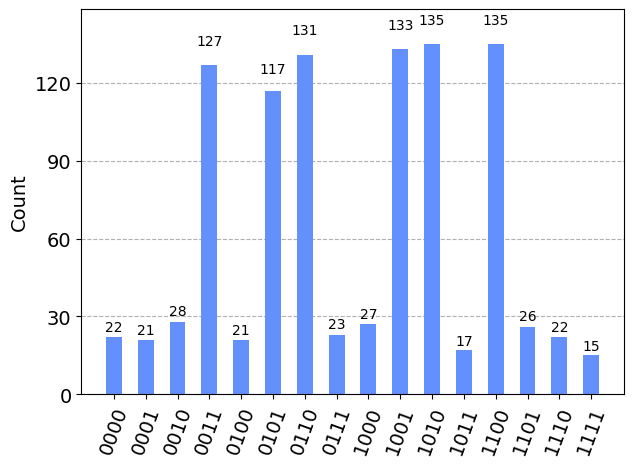

In [9]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

beta = 0.08
gamma = -0.094
cycle_time = 0

qr = QuantumRegister(4)
cr = ClassicalRegister(4)
qc = QuantumCircuit(qr, cr, name="main")
qc.h(qr[0])
qc.h(qr[1])
qc.h(qr[2])
qc.h(qr[3])
qc.cx(qr[0], qr[1])
qc.rz(2*3.14159*gamma, qr[1])
qc.cx(qr[0], qr[1])
qc.cx(qr[0], qr[3])
qc.rz(2*3.14159*gamma, qr[3])
qc.cx(qr[0], qr[3])
qc.cx(qr[0], qr[2])
qc.rz(2*3.14159*gamma, qr[2])
qc.cx(qr[0], qr[2])
qc.cx(qr[1], qr[2])
qc.rz(2*3.14159*gamma, qr[2])
qc.cx(qr[1], qr[2])
qc.cx(qr[1], qr[3])
qc.rz(2*3.14159*gamma, qr[3])
qc.cx(qr[1], qr[3])
qc.cx(qr[2], qr[3])
qc.rz(2*3.14159*gamma, qr[3])
qc.cx(qr[2], qr[3])
qc.rx(2*3.14159*beta, qr[0])
qc.rx(2*3.14159*beta, qr[1])
qc.rx(2*3.14159*beta, qr[2])
qc.rx(2*3.14159*beta, qr[3])
qc.measure(qr[0], cr[0])
qc.measure(qr[1], cr[1])
qc.measure(qr[2], cr[2])
qc.measure(qr[3], cr[3])

from qiskit import execute, Aer
backend = Aer.get_backend("qasm_simulator")  # Use Aer qasm_simulator

job = execute(qc, backend, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print("Total counts are:", counts)

# Draw the circuit
print(qc)

# Plot a histogram
from qiskit.visualization import plot_histogram
plot_histogram(counts)
